In [1]:
library(tidyverse)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


(1) Data Description

The data for this project comes from a research Minecraft server that tracked player profiles and gameplay activity. There are two datasets: players.csv and sessions.csv.

The players dataset contains 197 players and seven variables: experience (skill level), subscribe (newsletter sign-up), hashedEmail (anonymous identifier), played_hours (total playtime), and name, gender, and age. On average, players have spent about 17.26 hours in the game, though some have played much more or very little.

The sessions dataset includes 1,536 gameplay sessions with start and end times. From these, session duration in minutes can be calculated. Most sessions last around 30 minutes, but some have negative or extremely long durations, suggesting recording errors. Some sessions also have missing end times, possibly due to disconnections or server issues.

Both datasets are linked by hashedEmail, allowing player-level information to connect with gameplay behaviour. The data is valuable for studying engagement but requires cleaning before modeling.

(2)Questions

This project focuses on the broad question: What player characteristics and behaviours are most related to whether a player subscribes to the game newsletter? Understanding this helps identify which players are more likely to stay engaged with the research group.

The specific question is: Can a player’s experience level and total hours played be used to predict whether they subscribe to the newsletter?

Response variable: subscribe (Yes/No) Explanatory variables: experience (categorical skill level) and played_hours (numeric engagement measure).

These variables come from players.csv. The sessions data may be merged later if more detailed engagement features, such as average session length, are needed. Before modeling, I will check for missing values, convert experience into a suitable format, and scale playtime if required. Once cleaned, I will apply a predictive model to test how well experience and playtime explain subscription behaviour.

(3)Exploratory Data Analysis and Visualization

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_played_hours
<dbl>
5.85


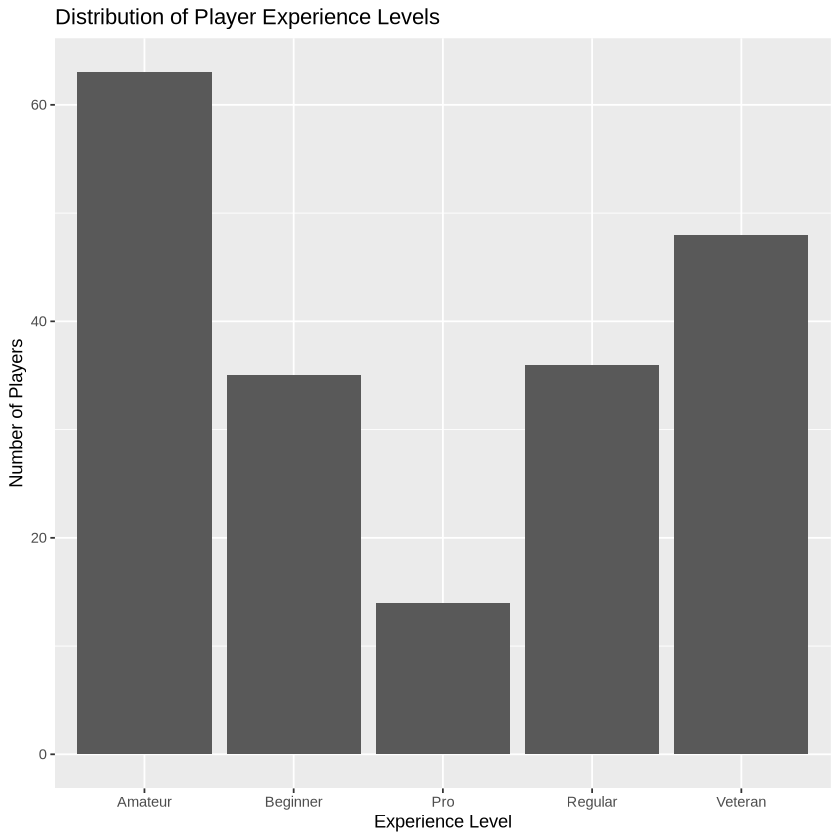

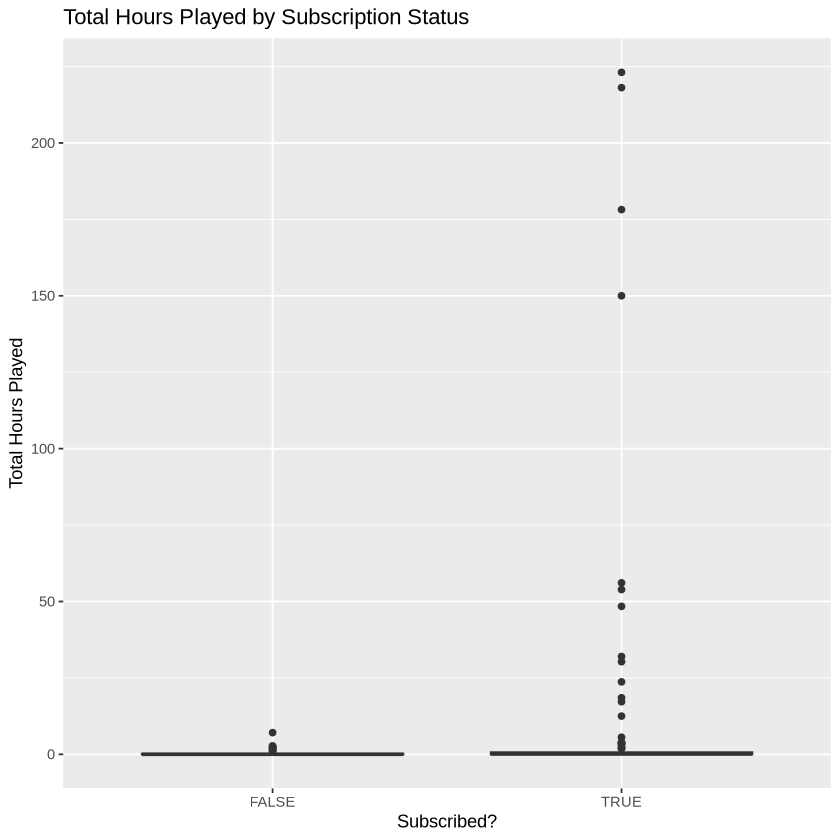

In [3]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")


sessions <- sessions |>
  mutate( start_time = ymd_hms(start_time), end_time = ymd_hms(end_time),
    session_duration_min = as.numeric(difftime(end_time, start_time, units = "mins")))

players |>
  summarise(mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2))

players_p1 <- players |>
  ggplot(aes(x = experience)) +
  geom_bar() +
  labs(title = "Distribution of Player Experience Levels",
       x = "Experience Level",
       y = "Number of Players")

players_p2 <- players |>
  ggplot(aes(x = subscribe, y = played_hours)) +
  geom_boxplot() +
  labs(title = "Total Hours Played by Subscription Status",
       x = "Subscribed?",
       y = "Total Hours Played")

players_p1
players_p2

Distribution of Player Experience Levels: The player base is polarized—many are either new (Amateurs) or highly experienced (Veterans), with fewer in between. This suggests players either engage casually or commit deeply.

Total Hours Played by Subscription Status: Players with higher total hours are more likely to be subscribers. Non-subscribers typically have low playtime, while frequent players tend to subscribe.

(4)Methods and Plan

For this project, I will use a logistic regression model to test whether a player’s experience level and total hours played predict their likelihood of subscribing to the newsletter. Logistic regression is appropriate because it models a binary outcome and clearly shows how each variable affects subscription probability. It assumes independent observations, a linear relationship between numeric predictors and log-odds of the response, and low correlation between predictors. Before fitting the model, I will clean the data, handle missing values and outliers, and convert experience into dummy variables. The dataset will be split into training (70%) and testing (30%) sets to evaluate model performance using accuracy, precision, and AUC. This provides an interpretable baseline for identifying which player characteristics are most associated with newsletter subscription.

(5)